# Import libraries

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from random import shuffle
import random

In [2]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Define constants & methods

In [3]:
%%javascript
var kernel = IPython.notebook.kernel;
var body = document.body,  
    attribs = body.attributes;
var command = "version_name = " + "'"+attribs['data-notebook-name'].value+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [4]:
version_name = version_name.split('.')[0]

In [5]:
save_model_path = "/home/sch17/Documents/fyp/notebooks/inception/output/"+version_name
save_history_path = "/home/sch17/Documents/fyp/notebooks/inception/output/"+version_name

In [6]:
save_history_path

'/home/sch17/Documents/fyp/notebooks/inception/output/Inception_v2_kcross'

In [7]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)

input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [8]:
# plot graphs for training and valdation data
def plot_graphs(history):
  acc = [0.] + history.history['accuracy']
  val_acc = [0.] + history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(acc,'o-g', label='Training Accuracy')
  plt.plot(val_acc, 'o-r',label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.ylabel('Accuracy')
  plt.ylim([min(plt.ylim()),1])
  plt.title('Training and Validation Accuracy')

  plt.subplot(2, 1, 2)
  plt.plot(loss, 'o-g', label='Training Loss')
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')
  plt.legend(loc='upper right')
  plt.ylabel('Cross Entropy')
  plt.ylim([0,3.0])
  plt.title('Training and Validation Loss')
  plt.xlabel('epoch')
  plt.show()

In [9]:
# get accuray of test data
def getModelAccuracy(dataframe):
    sample_test = dataframe
    correctPredictions = 0

    correctNormalPred = 0
    correctCovidPred = 0
    correctPneumoniaPred = 0

    totalNormalPred = 0
    totalCovidPred = 0
    totalPneumoniaPred = 0

    for index, row in sample_test.iterrows():

        filename = row['filename']
        prediction = row['category']

        # img = load_img(path + 'CrossValidationDataset\\' + filename, target_size=IMAGE_SIZE)

        if (path +'/normal') in filename:

            if prediction == 0:
                correctPredictions += 1
                correctNormalPred += 1

            totalNormalPred += 1

        if (path + '/covid') in filename:

            if prediction == 1: 
                correctPredictions += 1
                correctCovidPred += 1

            totalCovidPred += 1

        if (path + '/pneumonia') in filename:

            if prediction == 2: 
                correctPredictions += 1
                correctPneumoniaPred += 1

            totalPneumoniaPred += 1
            
    print('Model Accuracy:', "{:.2%}".format(correctPredictions / test_df.shape[0]))
    print('Correct Predictions:', correctPredictions, 'Total Predictions:', test_df.shape[0])

    print('\nNormal Predictions:', correctNormalPred, 'Accuracy', "{:.2%}".format(correctNormalPred /  totalNormalPred))
    print('Covid Predictions:', correctCovidPred, 'Accuracy', "{:.2%}".format(correctCovidPred /  totalCovidPred))
    print('Pneumonia Predictions:', correctPneumoniaPred, 'Accuracy', "{:.2%}".format(correctPneumoniaPred / totalPneumoniaPred))
    
    return (correctPredictions / test_df.shape[0]) * 100

In [10]:
# plot confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import itertools

# np_config.enable_numpy_behavior()
    
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion Matrix',
                          cmap=None,
                          normalize=True):

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Oranges')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    # thresh = np.max(cm) / 1.5 if normalize else np.max(cm) / 2

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    



In [11]:
path = "/home/sch17/Documents/fyp/dataset"

# Model






In [12]:
def CNNModel():
  # init_model = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape=input_shape)
  init_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False, input_shape=input_shape)
  x = init_model.output
  x = tfl.GlobalAveragePooling2D()(x)
  x = tfl.Dropout(0.2)(x)
  x = tfl.Dense(3, activation='softmax')(x) # 3 units
  new_model = Model(inputs=init_model.input, outputs=x)
  # without freezing layers - without getting pre-trained parameters

  return new_model

In [13]:
test_model = CNNModel()

In [14]:
test_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

# Create dataframe

In [15]:
directories = ['/normal']
categories = []
filenames = []
    
files = os.listdir(path + directories[0])

for img in files:
    categories.append(0)
    filenames.append(path+directories[0]+"/"+img)

files.sort()
df_NORMAL = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(df_NORMAL.shape[0])
df_NORMAL.head()

directories = ['/pneumonia']
categories = []
filenames = []
    
files = os.listdir(path + directories[0])

for img in files:
    categories.append(2)
    filenames.append(path+directories[0]+"/"+img)

files.sort()
df_PNEUMONIA = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(df_PNEUMONIA.shape[0])
df_PNEUMONIA.head()

directories = ['/covid']
categories = []
filenames = []
    
files = os.listdir(path + directories[0])

for img in files:
    categories.append(1)
    filenames.append(path+directories[0]+"/"+img)

files.sort()
df_COVID = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

print(df_COVID.shape[0])
df_COVID.head()


1583
4273
3616


,filename,category
0,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1
1,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1
2,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1
3,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1
4,/home/sch17/Documents/fyp/dataset/covid/COVID-...,1


In [16]:
pd.options.display.max_colwidth = 100

In [17]:
df = pd.concat([df_NORMAL, df_PNEUMONIA, df_COVID])


In [18]:
# shuffle data
df = df.sample(frac=1).reset_index(drop = True)
df

,filename,category
0,/home/sch17/Documents/fyp/dataset/pneumonia/person1596_bacteria_4184.jpeg,2
1,/home/sch17/Documents/fyp/dataset/pneumonia/person1850_bacteria_4721.jpeg,2
2,/home/sch17/Documents/fyp/dataset/pneumonia/person541_bacteria_2275.jpeg,2
3,/home/sch17/Documents/fyp/dataset/covid/COVID-2069.png,1
4,/home/sch17/Documents/fyp/dataset/normal/IM-0411-0001.jpeg,0
...,...,...
9467,/home/sch17/Documents/fyp/dataset/normal/NORMAL2-IM-0361-0001.jpeg,0
9468,/home/sch17/Documents/fyp/dataset/normal/NORMAL2-IM-1314-0001.jpeg,0
9469,/home/sch17/Documents/fyp/dataset/covid/COVID-3494.png,1
9470,/home/sch17/Documents/fyp/dataset/pneumonia/person121_bacteria_580.jpeg,2


<AxesSubplot:>

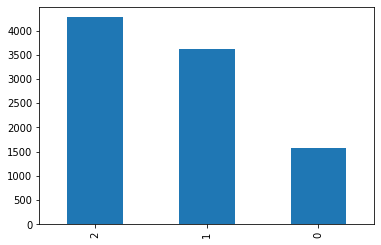

In [19]:
df['category'].value_counts().plot.bar()

train/val/test split - 60% | 20% | 20%

# K cross

Found 5682 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/40
178/178 [==============================] - 509s 3s/step - loss: 0.1501 - accuracy: 0.9453 - val_loss: 0.2206 - val_accuracy: 0.9636

Epoch 00001: val_loss improved from inf to 0.22059, saving model to /home/sch17/Documents/fyp/notebooks/inception/output/Inception_v2_kcross_0.h5
Epoch 2/40
178/178 [==============================] - 498s 3s/step - loss: 0.0827 - accuracy: 0.9729 - val_loss: 0.1156 - val_accuracy: 0.9784

Epoch 00002: val_loss improved from 0.22059 to 0.11558, saving model to /home/sch17/Documents/fyp/notebooks/inception/output/Inception_v2_kcross_0.h5
Epoch 3/40
178/178 [==============================] - 497s 3s/step - loss: 0.0604 - accuracy: 0.9794 - val_loss: 0.1149 - val_accuracy: 0.9858

Epoch 00003: val_loss improved from 0.11558 to 0.1148

178/178 [==============================] - 497s 3s/step - loss: 2.3304e-06 - accuracy: 1.0000 - val_loss: 0.1340 - val_accuracy: 0.9873

Epoch 00038: val_loss did not improve from 0.08608
Epoch 39/40
178/178 [==============================] - 497s 3s/step - loss: 1.1760e-05 - accuracy: 1.0000 - val_loss: 0.1391 - val_accuracy: 0.9879

Epoch 00039: val_loss did not improve from 0.08608
Epoch 40/40
178/178 [==============================] - 497s 3s/step - loss: 1.7503e-05 - accuracy: 1.0000 - val_loss: 0.1513 - val_accuracy: 0.9868

Epoch 00040: val_loss did not improve from 0.08608


<ipython-input-8-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


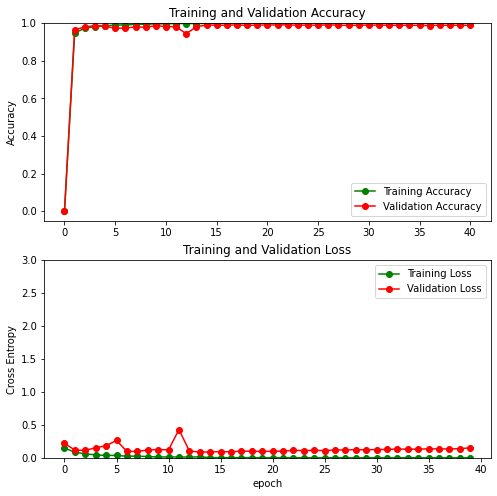

Found 1895 validated image filenames.
Model Accuracy: 98.52%
Correct Predictions: 1867 Total Predictions: 1895

Normal Predictions: 317 Accuracy 95.77%
Covid Predictions: 705 Accuracy 100.00%
Pneumonia Predictions: 845 Accuracy 98.37%


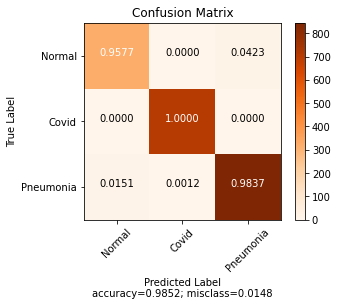

              precision    recall  f1-score   support

      Normal       0.96      0.96      0.96       331
       Covid       1.00      1.00      1.00       705
   Pneumonia       0.98      0.98      0.98       859

    accuracy                           0.99      1895
   macro avg       0.98      0.98      0.98      1895
weighted avg       0.99      0.99      0.99      1895

Precision: 0.9809638696855204
Recall: 0.9804686355126163
F1 : 0.9807153535377618
[[317   0  14]
 [  0 705   0]
 [ 13   1 845]]
Found 5682 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/40
178/178 [==============================] - 509s 3s/step - loss: 0.1425 - accuracy: 0.9527 - val_loss: 0.1616 - val_accuracy: 0.9641

Epoch 00001: val_loss improved from inf to 0.16162, saving model to /home/sch17/Documents/fyp/notebooks/inception/output/Inceptio

178/178 [==============================] - 496s 3s/step - loss: 5.4053e-05 - accuracy: 1.0000 - val_loss: 0.1292 - val_accuracy: 0.9836

Epoch 00036: val_loss did not improve from 0.06624
Epoch 37/40
178/178 [==============================] - 495s 3s/step - loss: 3.7105e-05 - accuracy: 1.0000 - val_loss: 0.1208 - val_accuracy: 0.9858

Epoch 00037: val_loss did not improve from 0.06624
Epoch 38/40
178/178 [==============================] - 495s 3s/step - loss: 2.8908e-06 - accuracy: 1.0000 - val_loss: 0.1148 - val_accuracy: 0.9868

Epoch 00038: val_loss did not improve from 0.06624
Epoch 39/40
178/178 [==============================] - 495s 3s/step - loss: 1.7361e-06 - accuracy: 1.0000 - val_loss: 0.1197 - val_accuracy: 0.9858

Epoch 00039: val_loss did not improve from 0.06624
Epoch 40/40
178/178 [==============================] - 494s 3s/step - loss: 3.2729e-06 - accuracy: 1.0000 - val_loss: 0.1350 - val_accuracy: 0.9852

Epoch 00040: val_loss did not improve from 0.06624


<ipython-input-8-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


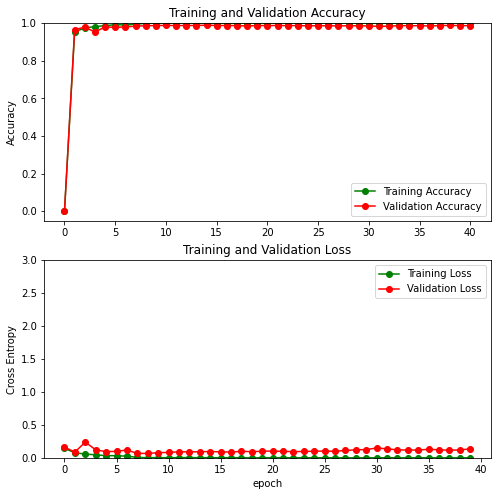

Found 1895 validated image filenames.
Model Accuracy: 98.21%
Correct Predictions: 1861 Total Predictions: 1895

Normal Predictions: 289 Accuracy 96.33%
Covid Predictions: 720 Accuracy 99.72%
Pneumonia Predictions: 852 Accuracy 97.59%


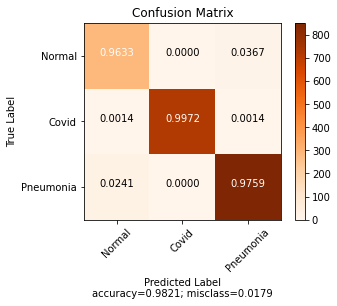

              precision    recall  f1-score   support

      Normal       0.93      0.96      0.95       300
       Covid       1.00      1.00      1.00       722
   Pneumonia       0.99      0.98      0.98       873

    accuracy                           0.98      1895
   macro avg       0.97      0.98      0.98      1895
weighted avg       0.98      0.98      0.98      1895

Precision: 0.9717905204239609
Recall: 0.978836089137657
F1 : 0.975201648198813
[[289   0  11]
 [  1 720   1]
 [ 21   0 852]]
Found 5683 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/40
178/178 [==============================] - 507s 3s/step - loss: 0.1604 - accuracy: 0.9426 - val_loss: 0.1996 - val_accuracy: 0.9472

Epoch 00001: val_loss improved from inf to 0.19962, saving model to /home/sch17/Documents/fyp/notebooks/inception/output/Inception_

178/178 [==============================] - 496s 3s/step - loss: 8.7272e-05 - accuracy: 1.0000 - val_loss: 0.0811 - val_accuracy: 0.9863

Epoch 00036: val_loss did not improve from 0.04311
Epoch 37/40
178/178 [==============================] - 496s 3s/step - loss: 2.2433e-05 - accuracy: 1.0000 - val_loss: 0.0804 - val_accuracy: 0.9852

Epoch 00037: val_loss did not improve from 0.04311
Epoch 38/40
178/178 [==============================] - 496s 3s/step - loss: 2.2480e-05 - accuracy: 1.0000 - val_loss: 0.0799 - val_accuracy: 0.9863

Epoch 00038: val_loss did not improve from 0.04311
Epoch 39/40
178/178 [==============================] - 495s 3s/step - loss: 4.4010e-04 - accuracy: 0.9998 - val_loss: 0.0825 - val_accuracy: 0.9852

Epoch 00039: val_loss did not improve from 0.04311
Epoch 40/40
178/178 [==============================] - 496s 3s/step - loss: 4.9712e-06 - accuracy: 1.0000 - val_loss: 0.0890 - val_accuracy: 0.9858

Epoch 00040: val_loss did not improve from 0.04311


<ipython-input-8-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


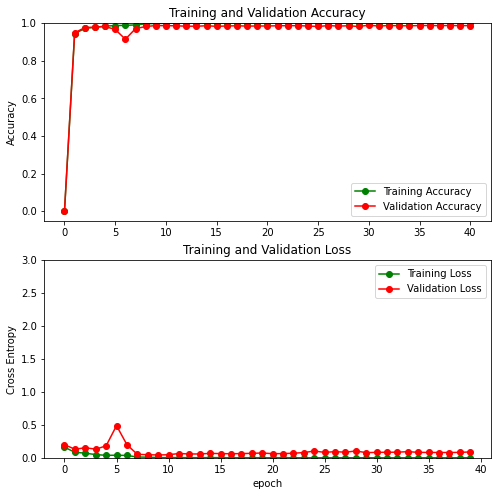

Found 1894 validated image filenames.
Model Accuracy: 99.10%
Correct Predictions: 1877 Total Predictions: 1894

Normal Predictions: 317 Accuracy 97.84%
Covid Predictions: 742 Accuracy 99.87%
Pneumonia Predictions: 818 Accuracy 98.91%


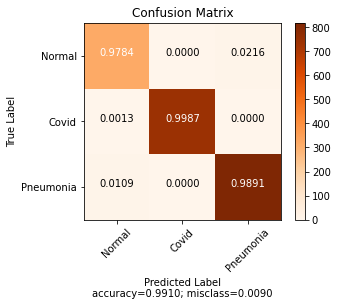

              precision    recall  f1-score   support

      Normal       0.97      0.98      0.97       324
       Covid       1.00      1.00      1.00       743
   Pneumonia       0.99      0.99      0.99       827

    accuracy                           0.99      1894
   macro avg       0.99      0.99      0.99      1894
weighted avg       0.99      0.99      0.99      1894

Precision: 0.9869780372532665
Recall: 0.9887221527076528
F1 : 0.9878425660091414
[[317   0   7]
 [  1 742   0]
 [  9   0 818]]
Found 5683 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/40
178/178 [==============================] - 506s 3s/step - loss: 0.1565 - accuracy: 0.9458 - val_loss: 0.1420 - val_accuracy: 0.9631

Epoch 00001: val_loss improved from inf to 0.14201, saving model to /home/sch17/Documents/fyp/notebooks/inception/output/Inceptio

178/178 [==============================] - 495s 3s/step - loss: 3.1308e-07 - accuracy: 1.0000 - val_loss: 0.1046 - val_accuracy: 0.9858

Epoch 00035: val_loss did not improve from 0.04705
Epoch 36/40
178/178 [==============================] - 495s 3s/step - loss: 4.1607e-04 - accuracy: 0.9996 - val_loss: 0.1097 - val_accuracy: 0.9847

Epoch 00036: val_loss did not improve from 0.04705
Epoch 37/40
178/178 [==============================] - 496s 3s/step - loss: 8.8472e-06 - accuracy: 1.0000 - val_loss: 0.1050 - val_accuracy: 0.9858

Epoch 00037: val_loss did not improve from 0.04705
Epoch 38/40
178/178 [==============================] - 495s 3s/step - loss: 3.1173e-07 - accuracy: 1.0000 - val_loss: 0.1126 - val_accuracy: 0.9852

Epoch 00038: val_loss did not improve from 0.04705
Epoch 39/40
178/178 [==============================] - 496s 3s/step - loss: 1.8064e-04 - accuracy: 0.9998 - val_loss: 0.0996 - val_accuracy: 0.9868

Epoch 00039: val_loss did not improve from 0.04705
Epoch 40/40


<ipython-input-8-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


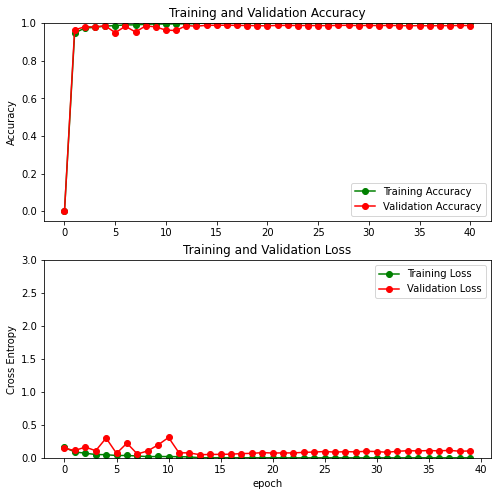

Found 1894 validated image filenames.
Model Accuracy: 98.73%
Correct Predictions: 1870 Total Predictions: 1894

Normal Predictions: 302 Accuracy 97.11%
Covid Predictions: 713 Accuracy 99.86%
Pneumonia Predictions: 855 Accuracy 98.39%


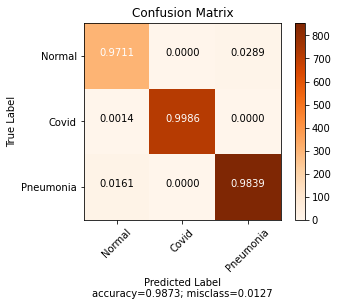

              precision    recall  f1-score   support

      Normal       0.95      0.97      0.96       311
       Covid       1.00      1.00      1.00       714
   Pneumonia       0.99      0.98      0.99       869

    accuracy                           0.99      1894
   macro avg       0.98      0.98      0.98      1894
weighted avg       0.99      0.99      0.99      1894

Precision: 0.9807549071153172
Recall: 0.9845166870722748
F1 : 0.9826036285357714
[[302   0   9]
 [  1 713   0]
 [ 14   0 855]]
Found 5683 validated image filenames belonging to 3 classes.
Found 1895 validated image filenames belonging to 3 classes.
------------------------------------------------------------------------
Training for fold 5 ...
Epoch 1/40
178/178 [==============================] - 506s 3s/step - loss: 0.1524 - accuracy: 0.9490 - val_loss: 0.1852 - val_accuracy: 0.9646

Epoch 00001: val_loss improved from inf to 0.18517, saving model to /home/sch17/Documents/fyp/notebooks/inception/output/Inceptio

178/178 [==============================] - 494s 3s/step - loss: 2.3135e-05 - accuracy: 1.0000 - val_loss: 0.0946 - val_accuracy: 0.9894

Epoch 00035: val_loss did not improve from 0.06468
Epoch 36/40
178/178 [==============================] - 494s 3s/step - loss: 1.4755e-06 - accuracy: 1.0000 - val_loss: 0.0917 - val_accuracy: 0.9884

Epoch 00036: val_loss did not improve from 0.06468
Epoch 37/40
178/178 [==============================] - 494s 3s/step - loss: 2.7480e-05 - accuracy: 1.0000 - val_loss: 0.0934 - val_accuracy: 0.9879

Epoch 00037: val_loss did not improve from 0.06468
Epoch 38/40
178/178 [==============================] - 495s 3s/step - loss: 7.1078e-04 - accuracy: 0.9996 - val_loss: 0.0917 - val_accuracy: 0.9884

Epoch 00038: val_loss did not improve from 0.06468
Epoch 39/40
178/178 [==============================] - 495s 3s/step - loss: 2.8497e-04 - accuracy: 0.9998 - val_loss: 0.0891 - val_accuracy: 0.9889

Epoch 00039: val_loss did not improve from 0.06468
Epoch 40/40


<ipython-input-8-8123d4d3f45c>:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_loss, 'o-r',label='Validation Loss',color='red')


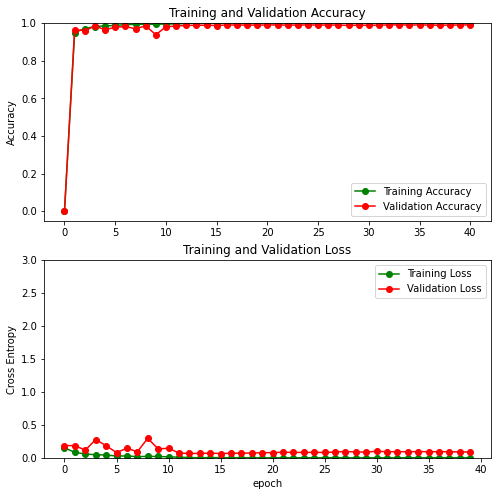

Found 1894 validated image filenames.
Model Accuracy: 98.52%
Correct Predictions: 1866 Total Predictions: 1894

Normal Predictions: 302 Accuracy 95.27%
Covid Predictions: 730 Accuracy 99.73%
Pneumonia Predictions: 834 Accuracy 98.70%


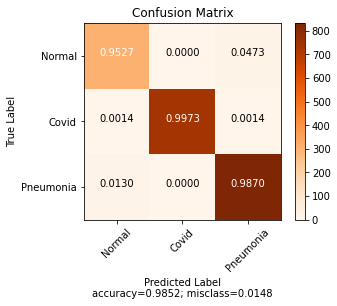

              precision    recall  f1-score   support

      Normal       0.96      0.95      0.96       317
       Covid       1.00      1.00      1.00       732
   Pneumonia       0.98      0.99      0.98       845

    accuracy                           0.99      1894
   macro avg       0.98      0.98      0.98      1894
weighted avg       0.99      0.99      0.99      1894

Precision: 0.9809866366928937
Recall: 0.9789771320320565
F1 : 0.9799711946497519
[[302   0  15]
 [  1 730   1]
 [ 11   0 834]]
[98.52242744063324, 98.20580474934036, 99.10242872228089, 98.73284054910243, 98.52164730728616]
average accuracy =  98.61702975372862


In [21]:
from sklearn.model_selection import KFold

fold_no = 1
batch_size = 32
epochs = 40

acc_per_fold = []
perf_per_fold = []

inputs = df['filename']
targets = df['category']

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)
i = 0

for train, test in kfold.split(inputs, targets):
  init_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False, input_shape=input_shape)
  x = init_model.output
  x = tfl.GlobalAveragePooling2D()(x)
  x = tfl.Dropout(0.2)(x)
  x = tfl.Dense(3, activation='softmax')(x) # 3 units
  model = Model(inputs=init_model.input, outputs=x)

  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate= 0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
  
  ##Separate Training Data
  categories = []
  
  for img in inputs[train]:

      fileName = img.split('.')[0]

      if 'normal' in fileName: categories.append(0)
      elif 'covid' in fileName: categories.append(1)
      else: categories.append(2)

  cross_val_df = pd.DataFrame ({
      'filename': inputs[train],
      'category': categories
  })
  
  cross_val_df["category"] = cross_val_df["category"].replace({0: 'Normal', 1: 'Covid', 2:'Pneumonia'})
  
  train_df, validate_df = train_test_split(cross_val_df, test_size=0.25)
  train_df = train_df.reset_index(drop=True)
  validate_df = validate_df.reset_index(drop=True)

  train_generator = ImageDataGenerator(
      preprocessing_function = tf.keras.applications.inception_v3.preprocess_input,
      width_shift_range = 0.1,
      height_shift_range = 0.1
      ).flow_from_dataframe (
        train_df, 
        x_col = 'filename',
        y_col = 'category',
        target_size = IMAGE_SIZE,
        class_mode = 'categorical',
        batch_size = batch_size
    )
  
  validation_generator = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input).flow_from_dataframe (
        validate_df, 
        x_col ='filename',
        y_col = 'category',
        target_size = IMAGE_SIZE,
        class_mode = 'categorical',
        batch_size = batch_size
    )
  
  
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  
  early_stopping = EarlyStopping(patience=10, verbose=1)
  model_checkpoint = ModelCheckpoint(save_model_path + '_' + str(i) +".h5", save_best_only=True, verbose=1)
  reduce_lr = ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)

  history = model.fit(train_generator,
                    validation_data=validation_generator, 
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[model_checkpoint, reduce_lr])
  
  model.save(save_model_path + '_' + str(i) +".h5") # save path
  filename = save_history_path+"history" + str(i) +".npy"
  np.save(filename,history.history)

  plot_graphs(history)

  ##Separate Testing Data
  test_filenames = []
    
  for img in inputs[test]:

      test_filenames.append(img)
      
  test_df = pd.DataFrame({
      'filename': test_filenames
  })
  
  nb_samples = test_df.shape[0]

  test_generator = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input).flow_from_dataframe(
      test_df, 
      x_col = 'filename',
      y_col = None,
      class_mode = None,
      target_size = IMAGE_SIZE,
      batch_size = batch_size,
      shuffle = False
  )

  #Get Test Data Predictions 
  predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

  # print("predict================================================================")
  # print(predict)
  # print("done================================================================")

  test_df['category'] = np.argmax(predict, axis=-1)
  label_map = dict((v,k) for k,v in train_generator.class_indices.items())
  test_df['category'] = test_df['category'].replace(label_map)
  test_df['category'] = test_df['category'].replace({'Normal': 0, 'Covid': 1, 'Pneumonia': 2})

  actual = []
  pred = []

  for row in test_df.iterrows():

      filename = row[1][0]

      if 'normal' in filename: actual.append(0)
      if 'covid' in filename: actual.append(1)
      if 'pneumonia' in filename: actual.append(2)
      pred.append(row[1][1])


  fold_no = fold_no + 1

  # Get performance metrics  
  accuracy = getModelAccuracy(test_df)
  acc_per_fold.append(accuracy)
  perf_per_fold.append([actual, pred])

  cf = confusion_matrix(actual, pred)

  # print("##############################printing cf#################################")
  # print(cf)
  # print(type(cf))
  # print("##############################done#################################")

    
  target_names = ['Normal','Covid', 'Pneumonia']
  plot_confusion_matrix(cf, target_names)

  print(classification_report(actual, pred, target_names=target_names))  
  # break
  # if(fold_no==4):
  
  # calculate precision
  precision = precision_score(actual, pred,  average='macro')
  print('Precision:', precision)

  # calculate recall
  recall = recall_score(actual, pred,  average='macro')
  print('Recall:', recall)

  # f1
  # f1 =  2 * (precision * recall) / (precision + recall)
  f1 = f1_score(actual, pred,  average='macro')
  print ("F1 :", f1)

  print(confusion_matrix(actual, pred))
print(acc_per_fold)
print("average accuracy = ",sum(acc_per_fold)/5)

/home/sch17/.local/lib/python3.8/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

(32, 224, 224, 3)


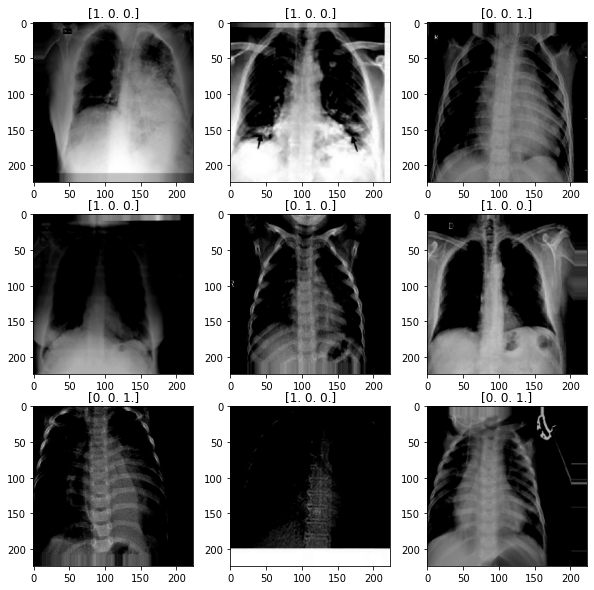

In [31]:
plt.figure(figsize=(10, 10))
batch=next(train_generator)  # returns the next batch of images and labels 
print(batch[0].shape) # batch[0] is the images, batch[1] are the labels

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  img=batch[0][i]
  plt.title(batch[1][i])
  plt.imshow(img)  

# Saved model

In [ ]:
loaded_model = tf.keras.models.load_model(save_model_path)











































































































# predict

In [ ]:
pre_test_df = test_df

In [ ]:
batch_size = 32
nb_samples = test_df.shape[0]

In [ ]:
test_generator = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input).flow_from_dataframe(
    test_df, 
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

In [ ]:
predict = loaded_model.predict(test_generator_eval, steps = np.ceil(nb_samples/batch_size))


In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
sample_test = test_df.head(18)
sample_test.head()

# Calculate Model Accuracy

In [ ]:
sample_test = test_df
correctPredictions = 0

correctNormalPred = 0
correctCovidPred = 0
correctPneuPred = 0

totalNormalPred = 0
totalCovidPred = 0
totalPneuPred = 0

for index, row in sample_test.iterrows():
    
    filename = row['filename']
    prediction = row['category']
    
    img = load_img( filename, target_size=IMAGE_SIZE)
    
    if 'normal' in filename:
        
        if prediction == 0:
            correctPredictions += 1
            correctNormalPred += 1
            
        totalNormalPred += 1
    
    if 'covid' in filename:
        if prediction == 1: 
            correctPredictions += 1
            correctCovidPred += 1
            
        totalCovidPred += 1
    
    if 'pneumonia' in filename:
        
        if prediction == 2: 
            correctPredictions += 1
            correctPneuPred += 1
            
        totalPneuPred += 1

In [ ]:
print('Model Accuracy:', "{:.2%}".format(correctPredictions / test_df.shape[0]))
print('Correct Predictions:', correctPredictions, 'Total Predictions:', test_df.shape[0])

print('\nNormal Predictions:', correctNormalPred, 'Accuracy', "{:.2%}".format(correctNormalPred /  totalNormalPred))
print('COVID-19 Predictions:', correctCovidPred, 'Accuracy', "{:.2%}".format(correctCovidPred /  totalCovidPred))
print('Viral Pneumonia Predictions:', correctPneuPred, 'Accuracy', "{:.2%}".format(correctPneuPred / totalPneuPred))

In [ ]:
actual = []
pred = []

for row in test_df.iterrows():
    
    filename = row[1][0]
    
    if 'normal' in filename: actual.append(0)
    if 'covid' in filename: actual.append(1)
    if 'pneumonia' in filename: actual.append(2)
        
    pred.append(row[1][1])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(actual, pred))  

In [ ]:
confusion_matrix(actual, pred)

# Predict single

In [ ]:
batch_size = 1
nb_samples = 1

In [ ]:
test_file = []
df_file = pd.DataFrame({
    'filename': test_file
})

In [ ]:
df_file

In [ ]:
test_single_gen = ImageDataGenerator(preprocessing_function = tf.keras.applications.inception_v3.preprocess_input).flow_from_dataframe(
    df_file, 
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

In [ ]:
predict = loaded_model.predict(test_single_gen, steps = np.ceil(nb_samples/batch_size))

In [ ]:
df_file['category'] = np.argmax(predict, axis=-1)

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
df_file['category'] = df_file['category'].replace(label_map)

In [ ]:
# df_file['category'] = df_file['category'].replace({'Normal': 0, 'Covid': 1, 'Pneumonia': 2})

In [ ]:
df_file